## Patient Analysis
This notebook is responsible for analyzing the "patient" survey responses that have been collected from this [survey](https://forms.gle/axv3s55uio7RmGZT6)

## Questions that we want to answer

- We want to know how likely it is that users will use a pickup box for prescriptions based on their age range
    - We want to know if our proposed solution will have a high customer acceptance rate
- We want to know what patients believe is the mean acceptable amount of time to wait to pick up prescriptions
    -  We want to have a benchmark by which we can determine if our solution meets the needs of customers.
- What is the probability of acceptance for a particular user cohort?


Import dependencies

In [167]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci
import pandas as pd
from pathlib import Path
import uuid
from IPython.display import display, HTML

# Some formating options
%config InlineBackend.figure_formats = ['svg']

def disp(df):
    """
    Displays a dataframe as HTML

    Args:
        df (dataframe): Dataframe
    """
    display(HTML(df.to_html()))
    
    


Load patient survery data into dataframe

In [168]:
file_path = "./output/patient-survey-data.csv"
df = pd.read_csv(file_path)

display_all_data = False

if display_all_data:
    disp(df)

## We want to know how likely it is that users will use a pickup box for prescriptions based on their age range

,Under 21,21 - 35,35 - 40,40 - 64,65 +
Not very likely,29,99,28,6,0.0
Somewhat likely,21,179,76,13,0.0
Very likely,8,168,32,12,1.0
Likely,7,161,52,8,0.0
Never,2,14,5,1,0.0


Text(0, 0.5, 'liklihood')

<Figure size 432x288 with 0 Axes>

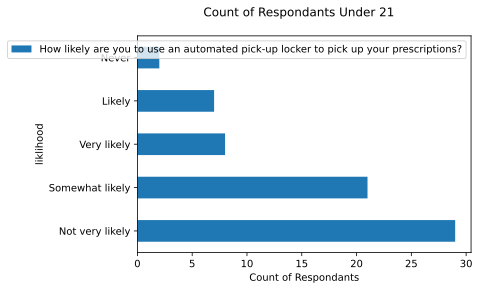

<Figure size 432x288 with 0 Axes>

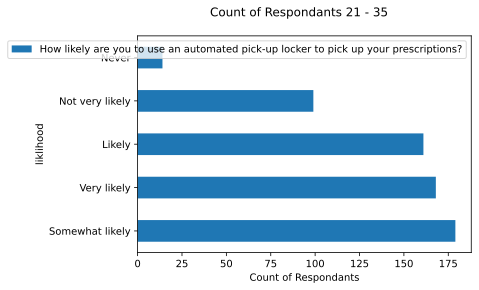

<Figure size 432x288 with 0 Axes>

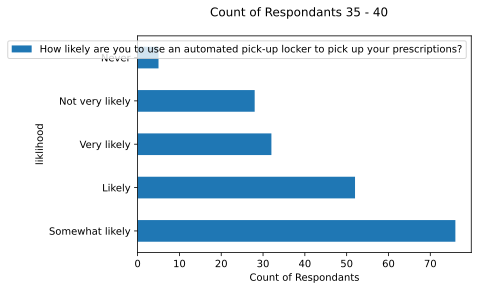

<Figure size 432x288 with 0 Axes>

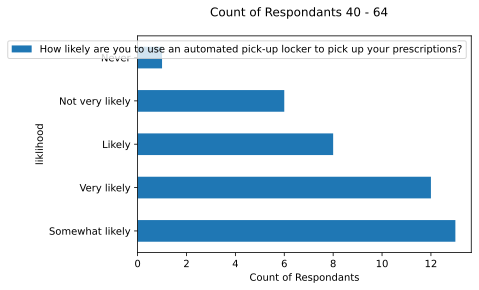

<Figure size 432x288 with 0 Axes>

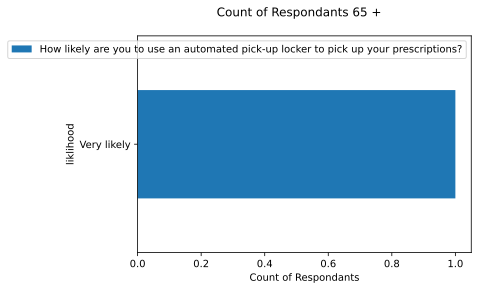

<Figure size 432x288 with 0 Axes>

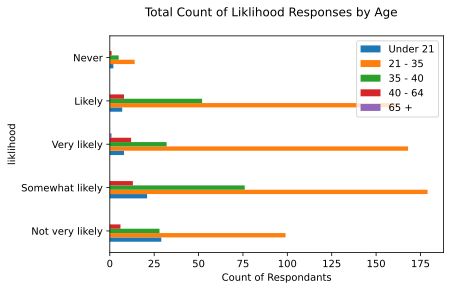

In [169]:
ages = ["Under 21", "21 - 35", "35 - 40", "40 - 64", "65 +"]
col_name = "How likely are you to use an automated pick-up locker to pick up your prescriptions?"

df_counts = pd.DataFrame()

for idx, age in enumerate(ages):
    frame = df.loc[df["What is your age range?"] == age]
    fig = plt.figure()
    counts = frame[col_name].value_counts()
    counts = counts.to_frame()
    counts.plot.barh()
    plt.suptitle(str("Count of Respondants " + age))
    plt.xlabel("Count of Respondants")
    plt.ylabel("liklihood")
    counts.rename(
        columns={col_name: age},
        inplace=True,
    )
    if idx == 0:
        df_counts = counts

    else:
        df_counts[age] = counts[age]
        df_counts.fillna(0)


df_counts = df_counts.fillna(0)
disp(df_counts)
plt.figure()
df_counts.plot.barh()
plt.suptitle("Total Count of Liklihood Responses by Age")
plt.xlabel("Count of Respondants")
plt.ylabel("liklihood")


,Under 21,21 - 35,35 - 40,40 - 64,65 +,All
Not very likely,0.432836,0.159420,0.145078,0.150,0.0,0.175325
Somewhat likely,0.313433,0.288245,0.393782,0.325,0.0,0.312771
Very likely,0.119403,0.270531,0.165803,0.300,1.0,0.240260
Likely,0.104478,0.259259,0.269430,0.200,0.0,0.247835
Never,0.029851,0.022544,0.025907,0.025,0.0,0.023810


Text(0, 0.5, 'liklihood')

<Figure size 432x288 with 0 Axes>

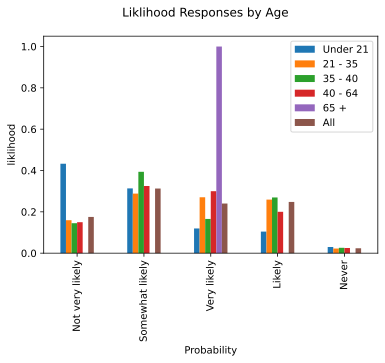

In [170]:
df_probs = df_counts
tot_counts = df[col_name].value_counts()
tot_counts = tot_counts.to_frame()

df_probs["All"] = tot_counts[col_name]

df_probs["All"] = df_probs["All"] / np.sum(df_probs["All"])

for age in ages:
    sum = np.sum(df_probs[age])
    df_probs[age] = df_probs[age] / sum

disp(df_probs)
plt.figure()
df_probs.plot.bar()
plt.suptitle("Liklihood Responses by Age")
plt.xlabel("Probability")
plt.ylabel("liklihood")